# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import gensim
from gensim import corpora
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,serial_number,heading,reviews,country,date,verified
0,0,0,disappointed,airplanes lounges worn old broken dallas heath...,United States,2023-09-28,trip verified
1,1,1,service shockingly bad,one worst experiences worst airline flight del...,United Kingdom,2023-09-28,trip verified
2,2,2,never fly ba,cancelled flight lastminute moved us onto flig...,United Kingdom,2023-09-27,trip verified
3,3,3,never fly awful airline,flight miami florida dublin ireland via london...,United States,2023-09-23,trip verified
4,4,4,’ never fly,started day ba prague flight actually left tim...,United States,2023-09-22,trip verified


In [4]:
data.drop('Unnamed: 0', axis=1)

,serial_number,heading,reviews,country,date,verified
0,0,disappointed,airplanes lounges worn old broken dallas heath...,United States,2023-09-28,trip verified
1,1,service shockingly bad,one worst experiences worst airline flight del...,United Kingdom,2023-09-28,trip verified
2,2,never fly ba,cancelled flight lastminute moved us onto flig...,United Kingdom,2023-09-27,trip verified
3,3,never fly awful airline,flight miami florida dublin ireland via london...,United States,2023-09-23,trip verified
4,4,’ never fly,started day ba prague flight actually left tim...,United States,2023-09-22,trip verified
...,...,...,...,...,...,...
3655,3655,british airways customer review,flew lhr vie return operated bmi ba aircraft a...,United Kingdom,2012-08-29,unverified
3656,3656,british airways customer review,lhr ham purser addresses club passengers name ...,United Kingdom,2012-08-28,unverified
3657,3657,british airways customer review,son worked british airways urged fly british a...,United Kingdom,2011-10-12,unverified
3658,3658,british airways customer review,london citynew york jfk via shannon a318 reall...,United States,2011-10-11,unverified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3660 non-null   int64 
 1   serial_number  3660 non-null   int64 
 2   heading        3660 non-null   object
 3   reviews        3660 non-null   object
 4   country        3660 non-null   object
 5   date           3660 non-null   object
 6   verified       3660 non-null   object
dtypes: int64(2), object(5)
memory usage: 200.3+ KB


## Removing unnecessary words

Words like, 'British Airways', 'ba', 'review', etc. does not add much information to the analysis and could lead to misinformation. To create a informative word cloud, we are going to remove those words from heading and reviews.

In [6]:
def unnecessary(input_list):
    unnecessary = ['flight','ba', 'british', 'airways', 'customer', 'reviews','review', 'british airway', 'customer review', 'review british']
    cleaned_list = []
    for element in input_list:
        a  = element.split()
        word = ' '.join(i for i in a if i not in unnecessary)
        cleaned_list.append(word)
    return cleaned_list

## Word Cloud

#### For heading

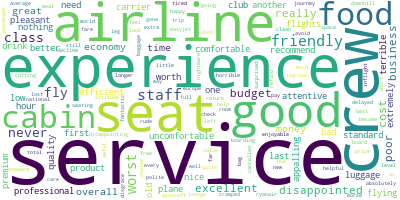

In [17]:
heading = unnecessary(data.heading)
heading_list = ','.join(list(heading))
# Create Wordcloud Backgroung
wordcloud = WordCloud(collocations=False,background_color='white', max_words=500,contour_width=3, contour_color='steelblue')

#generate a word cloud
wordcloud.generate(heading_list)

#Visualize the word cloud
wordcloud.to_image()

Most people have written reviews about services, experience and crew. A few people also find it good.

Bigger the size of the word, more would be its frequency and hence more would be its importance

#### for reviews

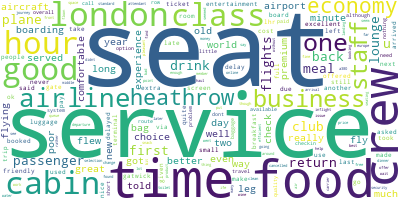

In [8]:
reviews = unnecessary(data.reviews)
review_list = ','.join(list(reviews))

#Wordcloud Background
wordcloud = WordCloud(collocations=False,background_color='white',max_words=4000,contour_width=3, contour_color='steelblue')

#generate a wordcloud
wordcloud.generate(review_list)

#Visualize wordcloud
wordcloud.to_image()

Majority of people have reviewed about the seat, service, time, food and crew.

## Topic Modelling

According to Analytics Vidhya-

            Topic modeling, an essential tool in statistics and natural language processing, encompasses a statistical model designed to reveal the abstract “topics” present in a set of documents.

In [9]:
import nltk
tokens = []
for i in heading:
    j = nltk.tokenize.word_tokenize(i)
    tokens.append(j)
id2word = corpora.Dictionary(tokens)

texts = tokens

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1)]


In [10]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(corpus,num_topics=10,id2word=id2word, passes=10)
topic = ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=False)

In [11]:
for topic_id, topic in topic:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['service', 'crew', 'good', 'cabin', 'excellent', 'friendly', 'efficient', 'cost', 'low', 'attentive']
Topic: 1
Words: ['airline', 'budget', 'uncomfortable', 'flying', 'seats', 'downhill', 'seating', 'gone', 'airlines', 'worth']
Topic: 2
Words: ['seat', 'service', 'poor', 'quality', 'appalling', 'legroom', 'little', 'really', 'care', 'leg']
Topic: 3
Words: ['food', 'us', 'check', 'drinks', 'europe', 'seats', 'nice', 'pretty', 'refund', 'attitude']
Topic: 4
Words: ['staff', 'friendly', 'professional', 'crew', 'overall', 'pleasant', 'cabin', 'helpful', 'cancelled', 'hours']
Topic: 5
Words: ['would', 'like', 'nothing', 'best', '’', 'avoid', 'easyjet', 'another', 'fly', 'fare']
Topic: 6
Words: ['better', 'service', 'standards', 'experience', 'great', 'need', 'get', 'lost', 'choice', 'rude']
Topic: 7
Words: ['service', 'disappointed', 'old', 'extremely', 'aircraft', 'disappointing', 'product', 'average', 'tired', 'plane']
Topic: 8
Words: ['comfortable', 'luggage', 'seats', '

In [12]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

ModuleNotFoundError: No module named 'pyLDAvis'

In [13]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, id2word)
pyLDAvis.display(lda_display)

NameError: name 'pyLDAvis' is not defined

# Sentiment Analysis

In [14]:
from textblob import TextBlob

Polarity determines the sentiment of the text. Its values lie in [-1,1] where -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.

Subjectivity determines whether a text input is factual information or a personal opinion. Its value lies between [0,1] where a value closer to 0 denotes a piece of factual information and a value closer to 1 denotes a personal opinion.

In [15]:
# Polarity
p = TextBlob(review_list).sentiment.polarity
print("Polarity:", p)

Polarity: 0.10688737061190134


In [16]:
#Subjectivity
s = TextBlob(review_list).sentiment.subjectivity
print("Subjectivity:", s)

Subjectivity: 0.496256559143259
